<a href="https://colab.research.google.com/github/Aashutosh-Basnet/Machine-Learning-Algorithms/blob/main/linear_regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [3]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df = df.drop_duplicates()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])

In [15]:
print(df['furnishingstatus'].head())
print(df['prefarea'].head())
print(df['mainroad'].head())
print(df['guestroom'].head())
print(df['basement'].head())
print(df['airconditioning'].head())
print(df['hotwaterheating'].head())

0    0
1    0
2    1
3    0
4    0
Name: furnishingstatus, dtype: int64
0    1
1    0
2    1
3    1
4    0
Name: prefarea, dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: mainroad, dtype: int64
0    0
1    0
2    0
3    0
4    1
Name: guestroom, dtype: int64
0    0
1    0
2    1
3    1
4    1
Name: basement, dtype: int64
0    1
1    1
2    0
3    1
4    1
Name: airconditioning, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: hotwaterheating, dtype: int64


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = ['price', 'area']
df[features] = scaler.fit_transform(df[features])

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,4,2,3,1,0,0,0,1,2,1,0
1,4.004484,1.757010,4,4,4,1,0,0,0,1,3,0,0
2,4.004484,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,3.985755,1.083624,4,2,2,1,0,1,0,1,3,1,0
4,3.554979,1.046726,4,1,2,1,1,1,0,1,2,0,0


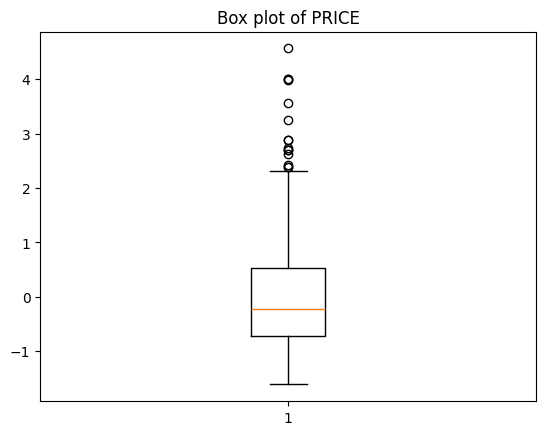

In [21]:
plt.boxplot(df['price'])
plt.title("Box plot of PRICE")
plt.show()

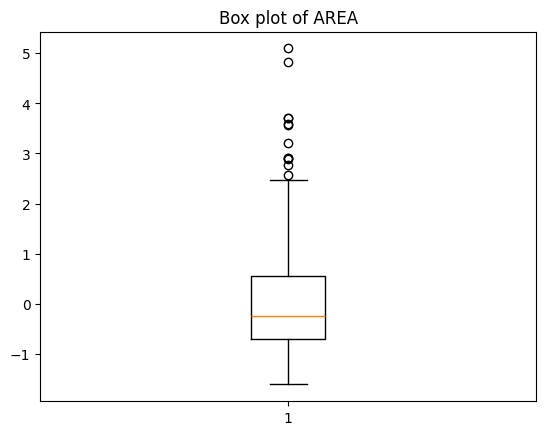

In [22]:
plt.boxplot(df['area'])
plt.title("Box plot of AREA")
plt.show()

In [23]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df[['price', 'area']]))

threshold = 3

outliers = (z_scores > threshold)

outliers_indices = np.where(outliers)[0]

df_cleaned = df.drop(outliers_indices)

In [25]:
correlation_matrix = df_cleaned.corr()

print(correlation_matrix)

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.528495  0.352859   0.489574  0.443878  0.307297   
area              0.528495  1.000000  0.129497   0.167196  0.109874  0.299403   
bedrooms          0.352859  0.129497  1.000000   0.358563  0.405674 -0.019085   
bathrooms         0.489574  0.167196  0.358563   1.000000  0.319255  0.033394   
stories           0.443878  0.109874  0.405674   0.319255  1.000000  0.122953   
mainroad          0.307297  0.299403 -0.019085   0.033394  0.122953  1.000000   
guestroom         0.300117  0.191426  0.083431   0.151740  0.043800  0.095785   
basement          0.178837  0.053352  0.106043   0.112140 -0.172284  0.042362   
hotwaterheating   0.109143 -0.032141  0.063358   0.084503  0.028125 -0.013548   
airconditioning   0.458606  0.242852  0.153869   0.178826  0.291883  0.102583   
parking           0.337198  0.342226  0.123750   0.145776  0.034466  0.198870   
prefarea          0.316284  

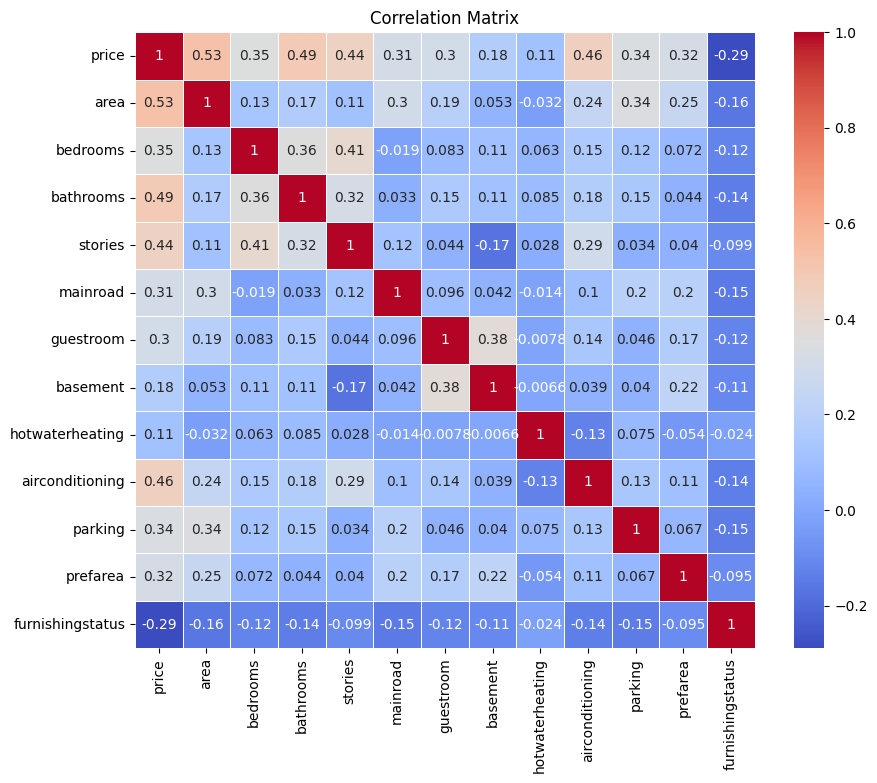

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Select correlations with 'PRICE' and filter out features with correlation below 0.15
low_corr_features = correlation_matrix['price'][abs(correlation_matrix['price']) < 0.15]

# Print the features that have a correlation below 0.15 with PRICE
print("Features with low correlation to PRICE (below 0.15):")
print(low_corr_features)

# Remove those columns from the DataFrame
df_cleaned = df.drop(columns=low_corr_features.index)

# Print the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned.head())

Features with low correlation to PRICE (below 0.15):
hotwaterheating    0.109143
Name: price, dtype: float64
Cleaned DataFrame:
      price      area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  4.566365  1.046726         4          2        3         1          0   
1  4.004484  1.757010         4          4        4         1          0   
2  4.004484  2.218232         3          2        2         1          0   
3  3.985755  1.083624         4          2        2         1          0   
4  3.554979  1.046726         4          1        2         1          1   

   basement  airconditioning  parking  prefarea  furnishingstatus  
0         0                1        2         1                 0  
1         0                1        3         0                 0  
2         1                0        2         1                 1  
3         1                1        3         1                 0  
4         1                1        2         0                 0  


In [29]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns = ['price'])
y = df_cleaned['price']

print(X.head())
print(y.head())

       area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  1.046726         4          2        3         1          0         0   
1  1.757010         4          4        4         1          0         0   
2  2.218232         3          2        2         1          0         1   
3  1.083624         4          2        2         1          0         1   
4  1.046726         4          1        2         1          1         1   

   airconditioning  parking  prefarea  furnishingstatus  
0                1        2         1                 0  
1                1        3         0                 0  
2                0        2         1                 1  
3                1        3         1                 0  
4                1        2         0                 0  
0    4.566365
1    4.004484
2    4.004484
3    3.985755
4    3.554979
Name: price, dtype: float64


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Training data shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Testing data shape (X_test, y_test): {X_test.shape}, {y_test.shape}")

Training data shape (X_train, y_train): (436, 11), (436,)
Testing data shape (X_test, y_test): (109, 11), (109,)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optional: Displaying the coefficients (weights) of the features
print("\nModel Coefficients:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Model Evaluation Results:
Mean Squared Error (MSE): 0.53
R-squared (R2): 0.64

Model Coefficients:
                  Coefficient
area                 0.274206
bedrooms             0.042648
bathrooms            0.593808
stories              0.223596
mainroad             0.190171
guestroom            0.121286
basement             0.216751
airconditioning      0.389204
parking              0.128607
prefarea             0.327609
furnishingstatus    -0.116449


In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 42)

In [35]:
model.fit(X_train_pca, y_train)

y_pred_pca = model.predict(X_test_pca)
r2_pca = r2_score(y_test, y_pred_pca)
print(f"R² after PCA: {r2_pca:.2f}")

R² after PCA: 0.63


In [42]:
def initialize_weights(n_features):
  w = np.zeros(n_features)
  b = 0
  return w, b

def compute_loss(X, y, w, b):
  n = X.shape[0]
  predictions = np.dot(X, w) + b
  loss = (1 / (2 * n)) * np.sum((predictions - y) ** 2)
  return loss

def compute_gradients(X, y, w, b):
  n = X.shape[0]
  predictions = np.dot(X, w) + b
  dw = (1 / n) * np.dot(X.T, (predictions - y))
  db = (1 / n) * np.sum(predictions - y)
  return dw, db

def gradient_descent(X, y, w, b, learning_rate, num_iterations):
  losses = []
  for i in range(num_iterations):
    dw, db = compute_gradients(X, y, w, b)
    w -= learning_rate * dw
    b -= learning_rate * db

    if i % 100 == 0:
      loss = compute_loss(X, y, w, b)
      print(f"Iteration {i}, Loss: {loss:.4f}")

  return w, b, losses


w, b = initialize_weights(X_train.shape[1])

learning_rate = 0.01
iterations = 10000

w, b, losses = gradient_descent(X_train, y_train, w, b, learning_rate, iterations )

y_pred = np.dot(X_test, w) + b
r2 = r2_score(y_test, y_pred)
print(f"R² after Gradient Descent: {r2:.2f}")

Iteration 0, Loss: 0.4360
Iteration 100, Loss: 0.2364
Iteration 200, Loss: 0.2052
Iteration 300, Loss: 0.1935
Iteration 400, Loss: 0.1864
Iteration 500, Loss: 0.1811
Iteration 600, Loss: 0.1771
Iteration 700, Loss: 0.1739
Iteration 800, Loss: 0.1712
Iteration 900, Loss: 0.1689
Iteration 1000, Loss: 0.1669
Iteration 1100, Loss: 0.1652
Iteration 1200, Loss: 0.1637
Iteration 1300, Loss: 0.1623
Iteration 1400, Loss: 0.1611
Iteration 1500, Loss: 0.1599
Iteration 1600, Loss: 0.1589
Iteration 1700, Loss: 0.1579
Iteration 1800, Loss: 0.1570
Iteration 1900, Loss: 0.1562
Iteration 2000, Loss: 0.1554
Iteration 2100, Loss: 0.1547
Iteration 2200, Loss: 0.1540
Iteration 2300, Loss: 0.1533
Iteration 2400, Loss: 0.1527
Iteration 2500, Loss: 0.1521
Iteration 2600, Loss: 0.1516
Iteration 2700, Loss: 0.1511
Iteration 2800, Loss: 0.1506
Iteration 2900, Loss: 0.1501
Iteration 3000, Loss: 0.1497
Iteration 3100, Loss: 0.1493
Iteration 3200, Loss: 0.1489
Iteration 3300, Loss: 0.1485
Iteration 3400, Loss: 0.14